In [1]:
from uniswappy import *
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# from math import sqrt

# class UniswapImpLoss:
#     def __init__(self, lp, lp_init_amt):
#         self.lp = lp
#         self.lp_init = lp_init_amt
#         self.x_tkn_init = self._calc_dx(dL)
#         self.y_tkn_init = self._calc_dy(dL)

#     def current_position_value(self, tkn, lwr_tick = None, upr_tick = None):
#         """Calculate the current value of the LP position in terms of input token.""" 
#         return LPQuote(False).get_amount_from_lp(lp, tkn, self.lp_init, lwr_tick, upr_tick)

#     def hold_value(self, tkn):
#         """Calculate the value if initial tokens were held."""
#         tokens = lp.factory.token_from_exchange[lp.name]
#         if(tkn.token_name == lp.token0):
#             current_price = self.lp.get_price(tokens[lp.token1])
#             val = self.y_tkn_init*current_price + self.x_tkn_init
#         elif(tkn.token_name == lp.token1):   
#             current_price = self.lp.get_price(tokens[lp.token0])
#             val = self.x_tkn_init * current_price + self.y_tkn_init
#         return val 

#     def get_init_amt(self, tkn):
#         if(tkn.token_name == lp.token0):
#             return self.x_tkn_init
#         elif(tkn.token_name == lp.token1):  
#             return self.y_tkn_init

#     def apply(self, lwr_tick = None, upr_tick = None, fees = False):

#         if(fees):
#             """Calculate returns based current position."""
#             tokens = lp.factory.token_from_exchange[lp.name]
#             x_tkn = tokens[lp.token0]
#             v_hold = self.hold_value(x_tkn)
#             v_pos = self.current_position_value(x_tkn, lwr_tick, upr_tick)
#             iloss = (v_pos - v_hold)/v_hold
#         else:
#             """Calculate IL based on price ratio."""
#             tokens = lp.factory.token_from_exchange[lp.name]
#             x_tkn = tokens[lp.token0]
#             y_tkn = tokens[lp.token1]
#             initial_price = self.y_tkn_init / self.x_tkn_init
#             current_price = self.lp.get_price(x_tkn)
#             alpha = current_price / initial_price
#             if(self.lp.version == 'V2'):
#                 iloss = self.calc_iloss(alpha)
#             elif(self.lp.version == 'V3'):    
#                 r = self.calc_price_range(lwr_tick, upr_tick)
#                 iloss = self.calc_iloss(alpha, r)       

#         return iloss

#     def calc_iloss(self, alpha, r = None):
#         if(r == None):
#             return (2 * sqrt(alpha)) / (1 + alpha) - 1
#         else:
#             iloss = (2 * sqrt(alpha)) / (1 + alpha) - 1
#             scale =  sqrt(r)/(sqrt(r)-1)
#             return scale*iloss 

#     def calc_price_range(self, lwr_tick, upr_tick):
#         Q96 = 2**96
#         sqrtp_cur = lp.slot0.sqrtPriceX96/Q96
#         sqrtp_pb = TickMath.getSqrtRatioAtTick(upr_tick)/Q96
#         sqrtp_pa = TickMath.getSqrtRatioAtTick(lwr_tick)/Q96
#         ra = sqrtp_pa**2/sqrtp_cur**2
#         rb = sqrtp_pb**2/sqrtp_cur**2    
#         return sum([ra,rb])/2

#     def _calc_dx(self, dL):
#         if(self.lp.version == 'V2'):
#             return self._calc_univ2_dx(dL)
#         elif(self.lp.version == 'V3'): 
#             return self._calc_univ3_dx(dL)

#     def _calc_dy(self, dL):
#         if(self.lp.version == 'V2'):
#             return self._calc_univ2_dy(dL)
#         elif(self.lp.version == 'V3'): 
#             return self._calc_univ3_dy(dL)
        
#     def _calc_univ2_dx(self, dL):
#         tokens = lp.factory.token_from_exchange[lp.name]
#         x_tkn = tokens[lp.token0]
#         x = lp.get_reserve(x_tkn)
#         L = lp.get_liquidity()
#         return x*dL/L

#     def _calc_univ2_dy(self, dL):
#         tokens = lp.factory.token_from_exchange[lp.name]
#         y_tkn = tokens[lp.token1]
#         y = lp.get_reserve(y_tkn)
#         L = lp.get_liquidity()
#         return y*dL/L
    
#     def _calc_univ3_dx(self, dL):
#         Q96 = 2**96
#         sqrtp_pb = TickMath.getSqrtRatioAtTick(upr_tick)/Q96
#         sqrtp_cur = lp.slot0.sqrtPriceX96/Q96
#         dPx = (1/sqrtp_cur - 1/sqrtp_pb)     
#         return dL*dPx

#     def _calc_univ3_dy(self, dL):
#         Q96 = 2**96
#         sqrtp_pa = TickMath.getSqrtRatioAtTick(lwr_tick)/Q96
#         sqrtp_cur = lp.slot0.sqrtPriceX96/Q96
#         dPy = (sqrtp_cur - sqrtp_pa) 
#         return dL*dPy

In [3]:
# Instantiation Parameters
n_steps = 2000     # Number of steps 
start_price = 10 # Initial price SYS/USD
mu = 0.1; sigma = 0.5
n_paths = 1      # Number of simulationed paths
seconds_year = 31536000

# Brownian Model 
bm = BrownianModel(start_price)
p_arr = bm.gen_gbms(mu, sigma, n_steps-1, n_paths).flatten()

dt = datetime.timedelta(seconds=seconds_year/n_steps)
dates = [datetime.datetime.strptime("2024-09-01", '%Y-%m-%d') + k*dt for k in range(n_steps)]

In [4]:
user_nm = 'user0'
tkn1_amount = 1000
tkn2_amount = p_arr[0]*tkn1_amount

tkn1_nm = 'TKN1'
tkn2_nm = 'TKN2'

tkn1 = ERC20('TKN1', "0x111")
tkn2 = ERC20('TKN2', "0x09")
exchg_data = UniswapExchangeData(tkn0 = tkn1, tkn1 = tkn2, symbol="LP", address="0x011")

factory = UniswapFactory("pool factory", "0x2")
lp = factory.deploy(exchg_data)
Join().apply(lp, user_nm, tkn1_amount, tkn2_amount)

lp.summary()

Exchange TKN1-TKN2 (LP)
Reserves: TKN1 = 1000.0, TKN2 = 10000.0
Liquidity: 3162.2776601683795 



In [5]:
out = AddLiquidity().apply(lp, tkn1, user_nm, 10)
lp.summary()

dL = lp.get_last_liquidity_deposit()
iLoss = UniswapImpLoss(lp, dL)

Exchange TKN1-TKN2 (LP)
Reserves: TKN1 = 1010.0, TKN2 = 10100.0
Liquidity: 3193.900436770063 



In [6]:
tkn1_init_amt = iLoss.get_init_amt(tkn1)
tkn2_init_amt = iLoss.get_init_amt(tkn2)
tkn1_hold_amt = iLoss.hold_value(tkn1)
tkn2_hold_amt = iLoss.hold_value(tkn2)

print(f'Initial {tkn1.token_name} amount: {tkn1_init_amt:.2f}, Initial {tkn2.token_name} amount: {tkn2_init_amt:.2f}')
print(f'Hold {tkn1.token_name} amount: {tkn1_hold_amt:.2f}, Hold {tkn2.token_name} amount: {tkn2_hold_amt:.2f}')

Initial TKN1 amount: 10.00, Initial TKN2 amount: 100.00
Hold TKN1 amount: 20.00, Hold TKN2 amount: 200.00


In [7]:
arb = CorrectReserves(lp, x0 = p_arr[0])
TKN_amt = TokenDeltaModel(100)
pTKN1_TKN2_arr = []; 

for k in range(n_steps):

    # *****************************
    # ***** Random Swapping ******
    # *****************************
    Swap().apply(lp, tkn1, user_nm, TKN_amt.delta())
    Swap().apply(lp, tkn2, user_nm, p_arr[k]*TKN_amt.delta())
    
    # *****************************
    # ***** Rebalance ******
    # *****************************
    arb.apply(p_arr[k])

    # *****************************
    # ******* Data Capture ********
    # *****************************
    pTKN1_TKN2_arr.append(LPQuote().get_price(lp, tkn1))

lp.summary()

Exchange TKN1-TKN2 (LP)
Reserves: TKN1 = 1823.6593970342024, TKN2 = 16318.81724456412
Liquidity: 4789.9949450540735 



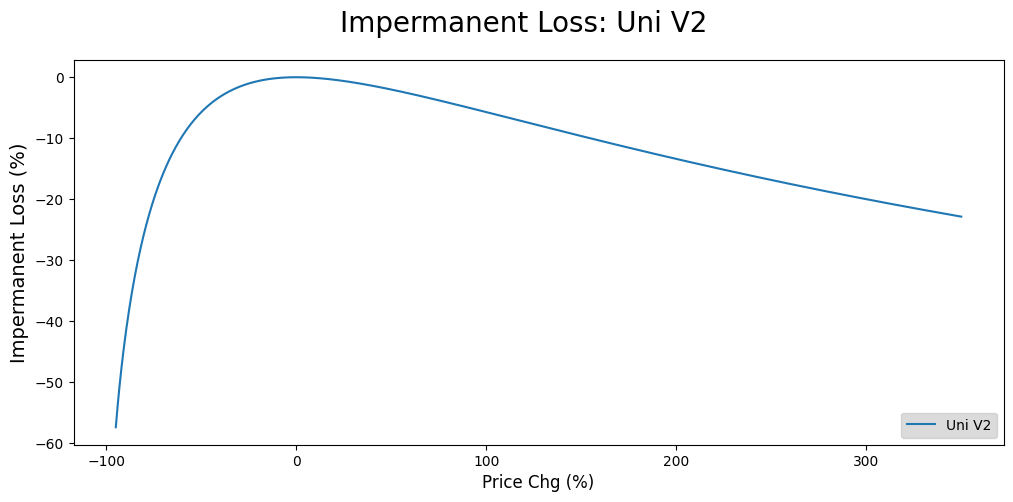

In [12]:
n_steps = 1000
alphas = np.linspace(0, 5, num=n_steps)
alpha_deltas = alphas-1

imp_loss = np.array([iLoss.calc_iloss(alpha) for alpha in alphas])

m0 = 10; m1 = 100
fig, (lp_ax) = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(12, 5))
fig.suptitle(f'Impermanent Loss: Uni V2', fontsize=20)
lp_ax.plot(100*alphas[m0:-m1]-100, 100*imp_loss[m0:-m1], label = f'Uni V2') 
lp_ax.set_xlabel("Price Chg (%)", fontsize=12)
lp_ax.set_ylabel("Impermanent Loss (%)", fontsize=14)  
lp_ax.legend(fontsize=10, facecolor="lightgray", loc='lower right')

In [9]:
tkn1_hold_amt = iLoss.hold_value(tkn1)
tkn2_hold_amt = iLoss.hold_value(tkn2)
tkn1_pos_amt = iLoss.current_position_value(tkn1)
tkn2_pos_amt = iLoss.current_position_value(tkn2)

print(f'{tkn1.token_name} hold amt: {tkn1_hold_amt:.2f}, {tkn2.token_name} hold amt: {tkn2_hold_amt:.2f}')
print(f'{tkn1.token_name} position amt: {tkn1_pos_amt:.2f}, {tkn2.token_name} position amt: {tkn2_pos_amt:.2f}')
print(f'Start price: {p_arr[0]:.2f}, End price: {p_arr[1]:.2f}')

TKN1 hold amt: 21.18, TKN2 hold amt: 189.48
TKN1 position amt: 23.96, TKN2 position amt: 214.44
Start price: 10.00, End price: 10.06


In [10]:
iloss_calc = iLoss.apply(fees = False)
returns_calc = iLoss.apply(fees = True)

print(f'Imp Loss: {100*iloss_calc:.2f}%, returns: {100*returns_calc:.2f} %')

Imp Loss: -0.15%, returns: 13.17 %
